# Logistic Regression as a Single Neuran of a Neural Network

Welcome to your first programming assignment! You will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset where logistic regression represents a single nueron. 

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 -  Loading Packages ##
First, let's run the cell below to import all the packages that you will need during this assignment. 

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import glob
from sklearn.model_selection import train_test_split
from load_dataset import*
%matplotlib inline

## 2 - Utility functions to convert images into datasets ##
The following functions are used to convert the cats and dogs images in the dataset folder into the numpy array format with labels. 

In [81]:
def convert_image_to_data(image, WIDTH, HEIGHT):
    image_resized = Image.open(image).resize((WIDTH, HEIGHT))
    image_array = np.array(image_resized).T
    return image_array

In [82]:

def create_train_test_data(num_pix,test_size=0.2):
    cat_files = glob.glob("datasets/cat*")
    dog_files = glob.glob("datasets/dog*")

    # Restrict cat and dog files here for testing
    cat_list = [convert_image_to_data(i, num_pix, num_pix) for i in cat_files]
    dog_list = [convert_image_to_data(i, num_pix, num_pix) for i in dog_files]

    y_cat = np.zeros(len(cat_list))
    y_dog = np.ones(len(dog_list))

    X = np.concatenate([cat_list, dog_list])
    X = np.concatenate([cat_list, dog_list])
    y = np.concatenate([y_cat, y_dog])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    return X_train, X_test, y_train, y_test
   

yeah


### 2.1 - Load data set ###
Use the utility functions provided above to load the train_set_x,train_set_y, test_set_x, test_set_y.
Set the `num_pix` to 64 and keep the `test_size` as the default value.

In [120]:
"""This is the code for Cat/Dog dataset

# set the num_pix to 64
num_pix = 64
# load the train_set_x_orig, test_set_x_orig, train_set_y, test_set_y
X_train, X_test, y_train, y_test = create_train_test_data(num_pix,test_size=0.2)

train_set_x= X_train
train_set_y = y_train
test_set_x = X_test
test_set_y = y_test
"""

# Set the value of num_pix
num_pix = 64

# Loading Dataset
datasets = load_dataset("car_dataset.hdf5")

#training data
x = np.array(datasets["train"]["X"])
y = np.array(datasets["train"]["Y"])

#testing
x1 = np.array(datasets["dev"]["X"])
y1 = np.array(datasets["dev"]["Y"])


'This is the code for Cat/Dog dataset\n\n# set the num_pix to 64\nnum_pix = 64\n# load the train_set_x_orig, test_set_x_orig, train_set_y, test_set_y\nX_train, X_test, y_train, y_test = create_train_test_data(num_pix,test_size=0.2)\n\ntrain_set_x= X_train\ntrain_set_y = y_train\ntest_set_x = X_test\ntest_set_y = y_test\n\n'

#### 2.1.1 - Print the shapes ###
Print the shape of the following variables
- Number of training examples: m_train
- Number of testing examples: m_test
- Height/Width of each image: num_px
- train_set_x shape
- train_set_y shape
- test_set_x shape
- test_set_y shape

In [121]:


""" This is for cat dog dataset

print("Number of training examples: ", train_set_x.shape[0])
print("Number of testing examples: ", test_set_x.shape[0])
print("Height/Width of each image:", num_pix)
print(train_set_x.shape)
print(train_set_y.shape)
print(test_set_x.shape)
print(test_set_y.shape)
"""
num_pix = 64
print("Number of training examples: ", x.shape[0])
print("Number of testing examples: ", x1.shape[0])
print("Height/Width of each image:", num_pix)
print (x.shape)
print (y.shape)
print (x1.shape)
print (y1.shape)


Number of training examples:  517
Number of testing examples:  172
(517, 64, 64, 3)
Height/Width of each image: 64
(517,)
(172, 64, 64, 3)
(172,)


#### 2.1.2 - Fixing ill-shape vectors ####
It is possible that the train_set_y and test_set_y have an ill-shape. Fix these shapes so the train_set_y and test_set_y are represented as a matrix with size (1, number of examples)

In [122]:
# your code here <begin>
flat_y = y.reshape(y.shape[0], -1).T
flat_y1 = y1.reshape(y1.shape[0], -1).T

train_set_yc = flat_y
test_set_yc = flat_y1

# Cat/Dog dataset
#train_set_y_f = train_set_y.reshape(train_set_y.shape[0], -1).T
#test_set_y_f = test_set_y.reshape(test_set_y.shape[0], -1).T
# your code here <end>

print ("train_set_y_f shape: " + str(flat_y.shape))
print ("test_set_y_f shape: " + str(flat_y1.shape))

train_set_y_f shape: (1, 517)
test_set_y_f shape: (1, 172)


### 2.2 - Flatten the data
Reshape the training and test data sets so that each image is flattened into single vectors of shape (num_px  ∗ num_px  ∗ 3, 1). Check the shapes for train_set_x_flatten and test_set_x_flatten.

In [123]:
flat_x = x.reshape(x.shape[0], -1).T
flat_x1 = x1.reshape(x1.shape[0], -1).T

#train_set_x_f = train_set_x.reshape(train_set_x.shape[0], -1).T
#test_set_x_f = test_set_x.reshape(test_set_x.shape[0], -1).T

print ("train_set_x shape: " + str(flat_x.shape))
print ("test_set_x shape: " + str(flat_x1.shape))

train_set_x shape: (12288, 517)
test_set_x shape: (12288, 172)


### 2.3 - Standardize the data
Divide every row of the dataset by 255 

In [124]:

train_set_xc = flat_x/255
test_set_xc = flat_x1/255

## 3 - Implementing the Helper Functions ## 

### 3.1 - Sigmoid function
Implement `sigmoid()`. 

In [108]:
def sigmoid(z):
    

    s = 1/(1+ np.exp(-z))
    return s

### 3.2 - Implement initialize_with_zeros
Write a function that initializes initialize w as a vector of zeros and set `b` to zero. 

In [109]:
def initialize_with_zeros(dim):
     
    w = np.zeros(shape=(dim,1))
    b = 0.0
   
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

### 3.3 - Forward propagation

Implement forward propagation to calculate $A$ and cost.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$


In [110]:
def forward_propogation(w,b,X,Y) :
    
    m = X.shape[1]  
   
    Z= np.dot(w.T,X)+b
    A = sigmoid(Z)     
    cost = (-1/m) * np.sum(Y* np.log(A)+ (1- Y) * np.log(1-A))  
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost,A,m

### 3.4 - Backward propagation

Implement backward propagation to compute gradients $dw$ and $db$
Here are the two formulas you will be using: 

$$ dw = \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ db = \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [111]:
def backward_propogation(w,b,X,Y) :
    m = X.shape[1]  
    Z= np.dot(w.T,X)+b
    A = sigmoid(Z) 
    #A = forward_propogation(w,b,X,Y)
    dz = A - Y
    dw = (1/m) * np.dot(X,dz.T)
    db = (1/m) * np.sum(dz)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    return dw,db

### 3.5 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. 

In [112]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost= False) :
    
    costs = []
    for i in range(num_iterations) :

        cost,A,m = forward_propogation(w,b,X,Y)
        dw,db = backward_propogation(w,b,X,Y)

        w = w-learning_rate*dw
        b = b-learning_rate*db

        if i % 100 == 0:
                costs.append(cost)

        if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i,cost))

    return dw,db,w,b,costs
    

### 3.6 - Prediction

Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [113]:
def predict(w, b, X_test):
    
    m = X_test.shape[1]
    w = w.reshape(X_test.shape[0], 1)
    Z= np.dot(w.T,X_test) + b
    A = sigmoid(Z)
    Y_prediction = np.around(A)
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

## 4 - Regression Model ##
Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [114]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
       
    # initialize parameters with zeros (≈ 1 line of code)
    n = X_train.shape[0]
    w, b = initialize_with_zeros(dim=n)
    
    # Gradient descent (≈ 1 line of code)
    dw,db,w,b,costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
    

## 5. Run the regression model function to train your model.
### 5.1 - Setting parameters (part 1)
Set the `num_iterations` to 5000 and `learning_rate` to 0.0005

(12288, 517)
(1, 517)
(12288, 173)
(1, 173)
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.548509
Cost after iteration 200: 0.496297
Cost after iteration 300: 0.459536
Cost after iteration 400: 0.432244
Cost after iteration 500: 0.411066
Cost after iteration 600: 0.394034
Cost after iteration 700: 0.379940
Cost after iteration 800: 0.368004
Cost after iteration 900: 0.357705
Cost after iteration 1000: 0.348679
Cost after iteration 1100: 0.340667
Cost after iteration 1200: 0.333477
Cost after iteration 1300: 0.326965
Cost after iteration 1400: 0.321019
Cost after iteration 1500: 0.315553
Cost after iteration 1600: 0.310498
Cost after iteration 1700: 0.305796
Cost after iteration 1800: 0.301404
Cost after iteration 1900: 0.297283
Cost after iteration 2000: 0.293401
Cost after iteration 2100: 0.289732
Cost after iteration 2200: 0.286254
Cost after iteration 2300: 0.282948
Cost after iteration 2400: 0.279796
Cost after iteration 2500: 0.276785
Cost after iteration 2600: 0.273

TypeError: float() argument must be a string or a number, not 'dict'

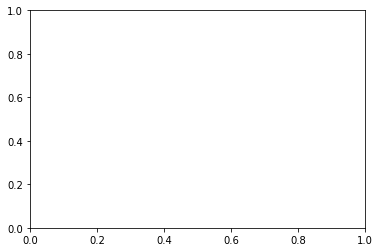

In [95]:

#Testing with the 'dev' as the test set

#Testing_mod= model(trainsetxc, trainsetyc, testsetxc, testsetyc,  num_iterations = 5000, learning_rate = 0.0005, print_cost = False)

# Testing with the 'test' as the test set [Also doing some preprocessing]
x = np.array(datasets["train"]["X"])
flat_x = x.reshape(x.shape[0], -1).T
train_set_xc1 = flat_x/255
print (train_set_xc1.shape)

y = np.array(datasets["train"]["Y"])
flat_y = y.reshape(y.shape[0], -1).T
train_set_yc1 = flat_y
print (train_set_yc1.shape)


x1 = np.array(datasets["test"]["X"])
flat_x1 = x1.reshape(x1.shape[0], -1).T
test_set_xc1 = flat_x1/255
print (test_set_xc1.shape)

y1 = np.array(datasets["test"]["Y"])
flat_y1 = y1.reshape(y1.shape[0], -1).T
test_set_yc1 = flat_y1
print (test_set_yc1.shape)

costs= model(train_set_xc1, train_set_yc1, test_set_xc1, test_set_yc1,  num_iterations = 5000, learning_rate = 0.0005, print_cost = True)


**Expected Output**: 

<table style="width:40%"> 
    
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 91.25 % </td>
    </tr>

    <tr>
        <td>**Test Accuracy** </td> 
        <td> 60.0 % </td>
    </tr>
</table> 




Let's also plot the cost function and the gradients.

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.548509
Cost after iteration 200: 0.496297
Cost after iteration 300: 0.459536
Cost after iteration 400: 0.432244
Cost after iteration 500: 0.411066
Cost after iteration 600: 0.394034
Cost after iteration 700: 0.379940
Cost after iteration 800: 0.368004
Cost after iteration 900: 0.357705
Cost after iteration 1000: 0.348679
Cost after iteration 1100: 0.340667
Cost after iteration 1200: 0.333477
Cost after iteration 1300: 0.326965
Cost after iteration 1400: 0.321019
Cost after iteration 1500: 0.315553
Cost after iteration 1600: 0.310498
Cost after iteration 1700: 0.305796
Cost after iteration 1800: 0.301404
Cost after iteration 1900: 0.297283
Cost after iteration 2000: 0.293401
Cost after iteration 2100: 0.289732
Cost after iteration 2200: 0.286254
Cost after iteration 2300: 0.282948
Cost after iteration 2400: 0.279796
Cost after iteration 2500: 0.276785
Cost after iteration 2600: 0.273902
Cost after iteration 2700: 0.271136
Cost

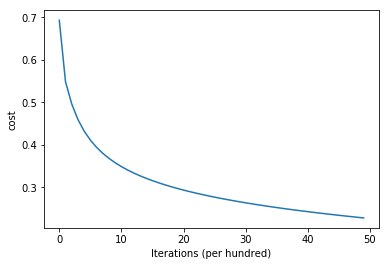

In [117]:

# plot for learning rate = 0.0005 and num_iterations as 5000 ['test set']
d = model(train_set_xc1, train_set_yc1, test_set_xc1, test_set_yc1,  num_iterations = 5000, learning_rate = 0.0005, print_cost = True)
costs =np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.title("Plot 1")
plt.xlabel('Iterations (per hundred)')
plt.show()

### 5.1 - Setting parameters (part 2)
Set the `num_iterations` to 2000 and `learning_rate` to 0.005 and run the model again. Plot the cost function.

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.348325
Cost after iteration 200: 0.293235
Cost after iteration 300: 0.263346
Cost after iteration 400: 0.242531
Cost after iteration 500: 0.226353
Cost after iteration 600: 0.213014
Cost after iteration 700: 0.201614
Cost after iteration 800: 0.191640
Cost after iteration 900: 0.182771
Cost after iteration 1000: 0.174791
Cost after iteration 1100: 0.167547
Cost after iteration 1200: 0.160925
Cost after iteration 1300: 0.154839
Cost after iteration 1400: 0.149219
Cost after iteration 1500: 0.144009
Cost after iteration 1600: 0.139162
Cost after iteration 1700: 0.134640
Cost after iteration 1800: 0.130409
Cost after iteration 1900: 0.126441
train accuracy: 97.48549323017409 %
test accuracy: 89.59537572254335 %


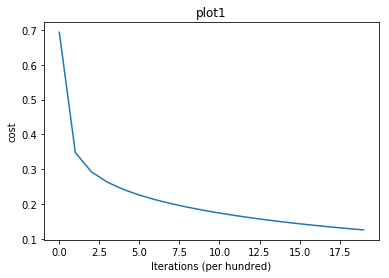

In [125]:
d=model(train_set_xc1, train_set_yc1, test_set_xc1, test_set_yc1,  num_iterations = 2000, learning_rate = 0.005, print_cost = True)
costs =np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.title("Plot 2")
plt.xlabel('Iterations (per hundred)')
plt.show()


In [ ]:
"""
Model Accuracy:

Model1 Accuracy on dev data is around 92%
Model1 Accuracy on test data is around 87%

Model2 Accuracy on dev data is around 97%
Model2 Accuracy on test data is around 89%
"""

### 5.3 - Analysis
Compare the cost function plots of part_1 and part_2. Write your observation below.

#### Write Your observation here

As we know, in Plot1 the learning rate is 0.0005 and number of iterations are 5000, whereas in Plot2 the learning rate is 0.005 and the number of iterations are 2000. As we can see, the number of iterations are decreased whereas the learning rate is increased from Plot1 to Plot2. If we decrease the learning rate then the cost function approaching the value of global minimum is better. Hence, in plot 1 better valiue of cost function is obtained. Similarly, if we decrease the value of number of iterations, then cost function approching global minnimum is better. From plots we can also see the cost function achieves a lower value in plot 1 smoothly. Hence, from the graph we can infer that a greater number learning iteration and lower value of learning rate is better for cost function. If we increase the complexity for this problem then only higher number of iterations and lower value of learning rate may provide reliable results.
Also the accuracy of Model2 is greater than Model1 because due to high number of iterations Model1 tends to overfit the data.